In [1]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()

f.load("File.fasta",enter)
for i in enter:
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName() 
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
for i in result:
   print(i.toString())

MDLNQR
K
EK
K
GQHVGCCGSR
TDLSADTVELIER
MDR
LAENQATASMSIVALPSSFQESNSSDR
CR
K
YCSSDEDSDTCIHGSANASTNATTNSSTNATTTASINVR
TSATTTASINVR
TSATTTESTNSNTNATTTESTNSSTNATTTASINVR
TSATTTESTNSSTNATTTASINVR
TSATTTESTNSSTNATTTASINVR
TSATTTESTNSNTNASTNATTNSSTNATTTASTNVR
TSATTNATTNSSTNATTTASTNVR
TSATTTASTNVR
TSATTTASINVR
TSATTTESINSSTNATTTESTNSNTSATTTESTDSNTNATTTASINVR
TSATTTESTNSNTSATTTESTDSNTSATTTASTNSSTNATTTASTNSSTNATTTESTNASAK
EDANK
DGNAEDNR
FHPVTDINK
ESYK
R
K
GSQMVFLER
K
K
LK
AQFPNTSENMNVLQFLGFR
SDEIK
HLFLYGIDIYFCPEGVFTQYGLCK
GCQK
MFGLCVCWAGQK
VSYR
R
IAWEALAVER
MLR
NDEEYK
EYLEDIEPYHGDPVGYLK
YFSVK
R
R
EIYSQIQR
NYAWYLAITR
R
R
ETISVLDSTR
GK
QGSQVFR
MSGR
QIK
ELYYK
VWSNLR
ESK
TEVLQYFLNWDEK
K
CR
EEWEAK
DDTVFVEALEK
VGVFQR
LR
SMTSAGLQGPQYVK
LQFSR
HHR
QLR
SR
YELSLGMHLR
DQLALGVTPSK
VPHWTAFLSMLIGLFYNK
TFR
QK
LEYLLEQISEMWLLPHWLDLANVEVLAADNTR
VPLYMLMVAVHK
ELDSDDVPDGR
FDIILLCR
DSSR
EVGE


In [10]:
from pyopenms import *
exp = MSExperiment()
MzMLFile().load("E:\Files\Fusion_180220_38.mzML", exp)
spectrum = exp.getSpectra()

In [11]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()
f.load("file.fasta",enter)
for i in enter :
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName()
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
peptides = [AASequence.fromString(i.toString()) for i in result]

for peptide in peptides:
    tsg = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    spec1 = MSSpectrum()

    p = Param()
    p.setValue("add_b_ions", "true")
    p.setValue("add_y_ions", "true")
    p.setValue("add_losses", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1) 
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ())

Spectrum 1 of MDLNQR has 31 peaks.
b2-H2O1+ is generated at m/z 98.02365556247099
y1-C1H2N1O1+ is generated at m/z 131.10531384957102
y1-C1H2N2+ is generated at m/z 133.097154849571
y1-H3N1+ is generated at m/z 158.092403817671
y1+ is generated at m/z 175.118952913371
b3-H2O1+ is generated at m/z 211.107719913371
b2+ is generated at m/z 247.07470564337098
y2-C1H2N1O1+ is generated at m/z 259.1638921047711
y2-C1H2N2+ is generated at m/z 261.15573310477106
y2-H3N1+ is generated at m/z 286.1509820728711
y2+ is generated at m/z 303.1775311685711
b4-H2O1+ is generated at m/z 325.150648104771
b4-H3N1+ is generated at m/z 326.13466407287103
b3+ is generated at m/z 360.158769994271
y3-C1H2N1O1+ is generated at m/z 373.2068202961711
y3-C1H2N2+ is generated at m/z 375.19866129617105
y3-H3N1+ is generated at m/z 400.1939102642711
y3+ is generated at m/z 417.2204593599711
b5-H2O1+ is generated at m/z 453.209226359971
b5-H3N1+ is generated at m/z 454.19324232807105
b4+ is generated at m/z 474.20169

In [12]:
for i in range(0,1):
    alignment =[]
    matchpeaks =[]
    observed_spectrum = spectrum[i]
    tsg = TheoreticalSpectrumGenerator()
    spa = SpectrumAlignment()
    p = spa.getParameters()
    p.setValue("tolerance", 0.5)
    p.setValue("is_relative_tolerance", "false")
    spa.setParameters(p)
    for j in range(len(result)):
        theo_spectrum = MSSpectrum()
        p = spa.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(theo_spectrum, result[j], 1, 2)
        alignment =[]
        spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)
        matchpeaks.append(len(alignment))
    print("Number of matched peaks: " + str(max(matchpeaks)))
    print("ion\ttheo. m/z\tobserved m/z")
    theo_spectrum = MSSpectrum()
    tsg.getSpectrum(theo_spectrum, result[matchpeaks.index(max(matchpeaks))], 1 , 2)
    spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)
    for theo_idx, obs_idx in alignment:
       ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
       ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
       print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(observed_spectrum[obs_idx].getMZ()))
 
    theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
    for theo_idx, obs_idx in alignment:
       theo_mz.append(theo_spectrum[theo_idx].getMZ())
       theo_int.append(theo_spectrum[theo_idx].getIntensity())
       obs_mz.append(observed_spectrum[obs_idx].getMZ())
       obs_int.append(observed_spectrum[obs_idx].getIntensity())
  
        

Number of matched peaks: 31
ion	theo. m/z	observed m/z
y3+	1	388.23029539187104	388.1973764468296
b7++	2	400.62380398572094	400.35668326468243
y8++	2	431.24306898757095	431.0960429196426
b4+	1	441.143848962371	440.809063203838
b8++	2	444.13981856547093	444.14029005009263
y9++	2	481.7669085992209	481.342284823807
b9++	2	501.6532906452209	501.84858124166
y10++	2	517.2854656789709	517.1708449026883
b10++	2	552.1771302568709	552.20317499518
b5+	1	556.170793121871	556.3129316910719
y11++	2	574.306929774671	573.8577817839447
y5+	1	588.346388902271	588.8428668017268
y12++	2	624.830769386321	625.2211351383037
y6+	1	659.383503061771	659.7629218613747
b12++	2	660.2237548770709	659.7947635753264
y13++	2	668.346783966071	668.1955400353319
b6+	1	685.213387345171	685.2129651256869
y7+	1	760.4311822850709	760.6427385144252
b7+	1	800.240331504671	800.6572730436136
b15++	2	800.7799576163209	800.6937583734127
y16++	2	819.4081022531711	819.2064048820921
b16++	2	836.2985146960709	836.2971149367373
b8+	1	8

In [13]:
print(str(result[matchpeaks.index(max(matchpeaks))]))

YCSSDEDSDTCIHGSANASTNATTNSSTNATTTASINVR


In [14]:
print(len(spectrum)) 

45696


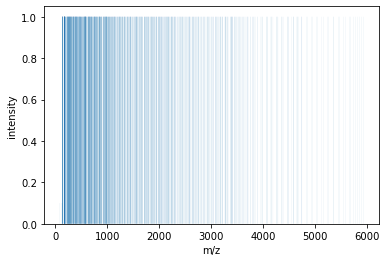

In [15]:
import numpy as np
from matplotlib import pyplot as plt
for r in result:
    peptide = AASequence.fromString(r.toString())
    tsg.getSpectrum(spec1,r,1,1)
plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) 
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] 
    theo_int = [element * -1 for element in theo_int] 
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = observed_spectrum.get_peaks()
print(min(obs_mz)) 
print(max(obs_mz)) 


theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= min(obs_mz) and mz <= max(obs_mz):
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)


376.22398827588853
1494.9301212337498


Number of matched peaks: 29
ion	theo. m/z	observed m/z
y3+	1	388.23029539187104	388.23030897086284
b8++	2	390.17451826427094	390.01754885458934
y8++	2	431.24306898757095	431.0961392393914
b9++	2	440.6983578759209	440.79177176053724
b5+	1	462.219457455671	462.17983076744025
y9++	2	481.7669085992209	481.8430559132509
b10++	2	497.71982197162095	497.71930789831737
y4+	1	501.31435974277105	501.7566735514748
y10++	2	517.2854656789709	517.1709605994977
b11++	2	541.235836551371	541.3514880250294
y11++	2	574.306929774671	573.835773312919
b12++	2	584.751851131121	584.8119823663347
y5+	1	588.346388902271	588.8084837122574
y12++	2	624.830769386321	624.7976966235115
b13++	2	635.2756907427711	634.9097605401096
y13++	2	668.346783966071	668.1947184702968
b14++	2	692.2971548384711	692.2082517725555
b7+	1	692.309730902271	692.2106958150268
y7+	1	760.4311822850709	760.2404813803025
b16++	2	778.3395515298711	778.7059914391689
b8+	1	779.341760061771	779.6400049252555
y16++	2	819.4081022531711	819.748072851

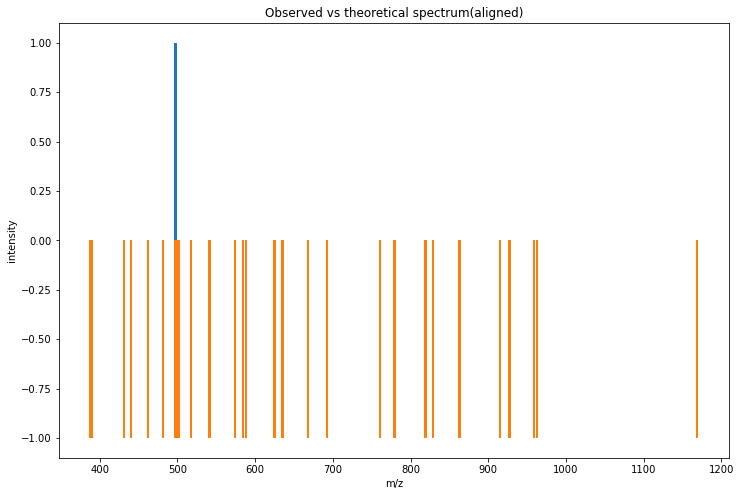

In [9]:
for i in range(0,1):
    alignment =[]
    matchpeaks =[]
    observed_spectrum = spectrum[i]
    tsg = TheoreticalSpectrumGenerator()
    spa = SpectrumAlignment()
    p = spa.getParameters()
    p.setValue("tolerance", 0.5)
    p.setValue("is_relative_tolerance", "false")
    spa.setParameters(p)
    for j in range(len(result)):
        theo_spectrum = MSSpectrum()
        p = spa.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(theo_spectrum, result[j], 1, 2)
        alignment =[]
        spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)
        matchpeaks.append(len(alignment))
    print("Number of matched peaks: " + str(max(matchpeaks)))
    print("ion\ttheo. m/z\tobserved m/z")
    theo_spectrum = MSSpectrum()
    tsg.getSpectrum(theo_spectrum, result[matchpeaks.index(max(matchpeaks))], 1 , 2)
    spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)
    for theo_idx, obs_idx in alignment:
       ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
       ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
       print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(observed_spectrum[obs_idx].getMZ()))
 
    theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
    for theo_idx, obs_idx in alignment:
       theo_mz.append(theo_spectrum[theo_idx].getMZ())
       theo_int.append(theo_spectrum[theo_idx].getIntensity())
       obs_mz.append(observed_spectrum[obs_idx].getMZ())
       obs_int.append(observed_spectrum[obs_idx].getIntensity())
    title = 'Observed vs theoretical spectrum(aligned)'
    mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)
